<a href="https://colab.research.google.com/github/tbararpour/hello-world/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 4.0MB/s 
     |████████████████████████████████| 9.5MB 10.7MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [7]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving MaunaLoaDailyTemps.csv to MaunaLoaDailyTemps.csv


In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['MaunaLoaDailyTemps.csv']),index_col='DATE'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)

Shape of data (1821, 5)


In [10]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


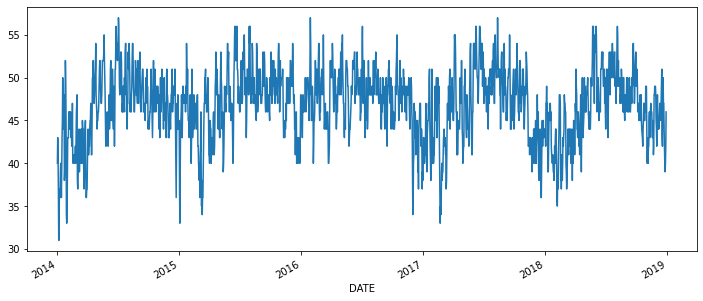

In [13]:
df['AvgTemp'].plot(figsize=(12,5))

In [15]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [16]:
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [18]:
pip install pmdarima

In [19]:
from pmdarima import auto_arima

In [21]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.973, Time=3.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.54 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.286, Time=3.59 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.061, Time=3.61 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=3.37 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.274, Time=4.19 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.188, Time=4.58 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.476, Time=5.02 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.681, Time=4.86 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.480
Date:                Fri, 09 Jul 2021   AIC                           8294.960
Time:                        14:36:09   BIC                           8339.017
Sample:                             0   HQIC                          8311.213
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2633      0.374      3.377      0.001       0.530       1.996
ar.L1          0.9729      0.008    120.958      0.000       0.957       0.989
ma.L1         -0.1266      0.024     -5.344      0.000      -0.173      -0.080
ma.L2         -0.2167      0.024     -8.987      0.000      -0.264      -0.169
ma.L3         -0.2038      0.024     -8.546      0.000      -0.251      -0.157
ma.L4         -0.1400      0.023     -6.164      0.000      -0.184      -0.095
ma.L5         -0.0471      0.024     -1.937      0.053      -0.095       0.001
sigma2         5.4837      0.171     32.032      0.000       5.148       5.819
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.67
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [23]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                     ARMA(1, 5)   Log Likelihood               -4070.198
Method:                       css-mle   S.D. of innovations              2.347
Date:                Fri, 09 Jul 2021   AIC                           8156.395
Time:                        14:41:08   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5857      0.785     59.355      0.000      45.047      48.124
ar.L1.AvgTemp     0.9856      0.007    150.630      0.000       0.973       0.998
ma.L1.AvgTemp    -0.1412      0.025     -5.735      0.000      -0.190      -0.093
ma.L2.AvgTemp    -0.2268      0.024     -9.295      0.000      -0.275      -0.179
ma.L3.AvgTemp    -0.2168      0.026     -8.416      0.000      -0.267      -0.166
ma.L4.AvgTemp    -0.1479      0.023     -6.300      0.000      -0.194      -0.102
ma.L5.AvgTemp    -0.0595      0.025     -2.411      0.016      -0.108      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0146           +0.0000j            1.0146            0.0000
MA.1            1.0883           -0.0000j            1.0883           -0.0000
MA.2            0.0555           -1.8423j            1.8431           -0.2452
MA.3            0.0555           +1.8423j            1.8431            0.2452
MA.4           -1.8432           -1.0734j            2.1330           -0.4161
MA.5           -1.8432           +1.0734j            2.1330            0.4161
-----------------------------------------------------------------------------
"""

In [43]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print (pred)

1791    44.754153
1792    44.987872
1793    45.388835
1794    45.721637
1795    45.863814
1796    45.874209
1797    45.884455
1798    45.894553
1799    45.904506
1800    45.914316
1801    45.923984
1802    45.933513
1803    45.942905
1804    45.952161
1805    45.961285
1806    45.970277
1807    45.979139
1808    45.987874
1809    45.996483
1810    46.004968
1811    46.013330
1812    46.021573
1813    46.029696
1814    46.037703
1815    46.045594
1816    46.053372
1817    46.061038
1818    46.068593
1819    46.076039
1820    46.083379
Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [ ]:
pred.index = df.index[start:end+1]
test.index = df.index[start:end+1]
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [41]:
print (pred)
print (test)

DATE
2018-12-01    44.754153
2018-12-02    44.987872
2018-12-03    45.388835
2018-12-04    45.721637
2018-12-05    45.863814
2018-12-06    45.874209
2018-12-07    45.884455
2018-12-08    45.894553
2018-12-09    45.904506
2018-12-10    45.914316
2018-12-11    45.923984
2018-12-12    45.933513
2018-12-13    45.942905
2018-12-14    45.952161
2018-12-15    45.961285
2018-12-16    45.970277
2018-12-17    45.979139
2018-12-18    45.987874
2018-12-19    45.996483
2018-12-20    46.004968
2018-12-21    46.013330
2018-12-22    46.021573
2018-12-23    46.029696
2018-12-24    46.037703
2018-12-25    46.045594
2018-12-26    46.053372
2018-12-27    46.061038
2018-12-28    46.068593
2018-12-29    46.076039
2018-12-30    46.083379
Name: ARIMA Predictions, dtype: float64
            MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2018-12-01     36.0     52.0     44.0      640    1743
2018-12-02     33.0     51.0     42.0      641    1743
2018-12-03     

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print (test['AvgTemp'].mean())
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

45.0
3.000495429601031


In [48]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency informa

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [49]:
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


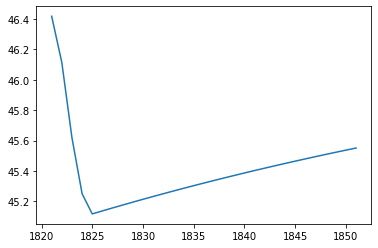

In [50]:
pred.plot()